# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations:
- According to the Max Temp vs Lattitude plot, the closer the lattitude gets to the equator, the higher the temperatures get. However, the highest temperatures can be found between 20 and 40 degrees in the Northern Hemisphere. 
- There does not seem to be a correlation between Latitude and Humidity, Cloudiness, or Wind Speed.
- Upon analyzing the the Hemisphere Lattitude vs Max Temp scatter plots, the Southern Hemisphere and Northern Hemisphere have inverse relationships with Max Temp. The Southern Hemisphere has a strong positive correlation, while the Northern Hemisphere has a strong negative correlation. This allows us to once again infer that the further away the lattitude is from the equator, the colder it will be.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base URL for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Empty lists for holding variables
name_city = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_spd = []
country = []
date = []

# Create a counter
counter = 1

# Print Statement
print("Beginning Data Retrieval")
print("-------------------------------")

# Create loop
for city in cities:
    
    # Wrap in try statement for cities with no record found
    # Run api request and append the values to the empty lists
    try:
        response = requests.get(url + "&q=" + city).json()
        name_city.append(response["name"])
        city_counter = response["name"]
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind_spd.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {counter}| {city_counter}")
        print(url + "&q=" + city)
        
        # Increase counter
        counter = counter + 1
        
        # Time delay so that we don't exceed api call limit
        time.sleep(1)
        
    # If no record found, skip and pass to next city
    except:
        print("City not found. Skipping to next city...")
        continue  

# End the Data Retrieval with a print statement
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

 

Beginning Data Retrieval
-------------------------------
Processing Record 1| Tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=tilichiki
Processing Record 2| Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=hermanus
City not found. Skipping to next city...
Processing Record 3| Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=isangel
Processing Record 4| Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=hobart
Processing Record 5| Tegul'det
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=teguldet
Processing Record 6| Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=clyde river
Processing Record 7| Antalaha
http://api.openwe

Processing Record 57| Bo Rai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=bo rai
City not found. Skipping to next city...
Processing Record 58| Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=jamestown
Processing Record 59| Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=rikitea
Processing Record 60| Werda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=werda
Processing Record 61| Gimli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=gimli
Processing Record 62| Mthatha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=umtata
Processing Record 63| Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1

Processing Record 113| Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=bonavista
City not found. Skipping to next city...
Processing Record 114| Funtua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=funtua
Processing Record 115| Colares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=colares
Processing Record 116| Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=qaanaaq
Processing Record 117| Asău
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=asau
Processing Record 118| Padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=padang
Processing Record 119| Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e0

Processing Record 170| Olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=olinda
City not found. Skipping to next city...
Processing Record 171| Destin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=destin
City not found. Skipping to next city...
City not found. Skipping to next city...
Processing Record 172| Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=hasaki
Processing Record 173| Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=rocha
Processing Record 174| Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=katsuura
Processing Record 175| Warrnambool
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=warrnambool
Processing Record 176| Op

Processing Record 225| Khomutovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=khomutovo
Processing Record 226| Kysyl-Syr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=kysyl-syr
Processing Record 227| Naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=naze
Processing Record 228| Coyhaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=coihaique
Processing Record 229| Shetpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=shetpe
Processing Record 230| Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=quatre cocos
Processing Record 231| Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=pi

Processing Record 281| Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=grindavik
Processing Record 282| Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=kamenka
Processing Record 283| Abbeville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=abbeville
Processing Record 284| Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=touros
Processing Record 285| Socorro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=socorro
Processing Record 286| Vitim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=vitim
Processing Record 287| Gisborne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=gisborne
Pr

City not found. Skipping to next city...
Processing Record 337| Baringo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=baringo
Processing Record 338| Shelburne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=shelburne
Processing Record 339| Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=nemuro
Processing Record 340| Eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=eyl
Processing Record 341| Rome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=roma
Processing Record 342| Andenes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=andenes
Processing Record 343| Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a

Processing Record 393| Bossangoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=bossangoa
Processing Record 394| Sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=sechura
Processing Record 395| Palapye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=palapye
Processing Record 396| Jatai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=jatai
Processing Record 397| Piaçabuçu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=piacabucu
Processing Record 398| Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=cayenne
Processing Record 399| Tekkali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=tekkali
Pr

Processing Record 449| Santa Catarina de Tepehuanes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=santa catarina de tepehuanes
Processing Record 450| Westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=westport
Processing Record 451| Amposta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=amposta
Processing Record 452| Russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=russell
Processing Record 453| Altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=altay
Processing Record 454| The Valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=the valley
Processing Record 455| Cascais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213

Processing Record 504| Marysville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=marysville
Processing Record 505| Changji
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=changji
Processing Record 506| Panzhihua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=panzhihua
Processing Record 507| Umm Hājar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=oum hadjer
Processing Record 508| Ābyek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=abyek
Processing Record 509| Morón
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=moron
Processing Record 510| Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=broome
P

Processing Record 560| Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=richards bay
Processing Record 561| Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=nanortalik
Processing Record 562| Outlook
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=outlook
Processing Record 563| Cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=cabedelo
Processing Record 564| Manavgat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=213d535e09919766a866e1c56931a9c1&q=manavgat
-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create a dictionary from lists in order to create a Data Frame
cities_data = {
    "City": name_city,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind_spd,
    "Country": country,
    "Date": date
}

# Create Data Frame
weather_df = pd.DataFrame(cities_data)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tilichiki,60.4667,166.1000,58.59,63,71,15.52,RU,1627425893
1,Hermanus,-34.4187,19.2345,55.80,75,88,15.70,ZA,1627425434
2,Isangel,-19.5500,169.2667,75.31,69,40,3.44,VU,1627425895
3,Hobart,-42.8794,147.3294,55.26,82,40,5.01,AU,1627425435
4,Tegul'det,57.3064,88.1667,50.85,91,29,0.13,RU,1627425898


In [7]:
# Export data to csv
weather_df.to_csv('../output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
# Check for humidity over 100 by looking at max value to ensure that we don't have any
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,18.698021,21.897716,68.727784,71.831560,53.581560,7.675532,1.627426e+09
std,33.824203,88.664718,14.027132,20.374949,38.468904,5.460204,3.179365e+02
min,-54.800000,-175.200000,34.160000,8.000000,0.000000,0.000000,1.627425e+09
25%,-9.121250,-55.052750,58.285000,62.000000,13.750000,3.440000,1.627426e+09
50%,22.541700,24.545750,69.790000,76.000000,57.500000,6.680000,1.627426e+09
75%,46.501700,100.221325,79.155000,87.000000,93.000000,10.597500,1.627426e+09
max,78.218600,179.316700,104.140000,100.000000,100.000000,26.310000,1.627427e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

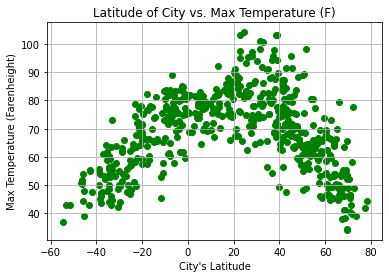

In [23]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker= "o", color= "green")

# Format
plt.xlabel("City's Latitude")
plt.ylabel("Max Temperature (Farenheight)")
plt.title("Latitude of City vs. Max Temperature (F)")
plt.grid(True)

# Save figure
plt.savefig('../output_data/lat_vs_temp.png')


## Latitude vs. Humidity Plot

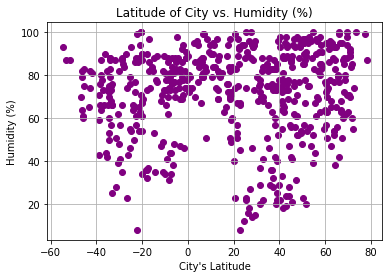

In [25]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker= "o", color= "purple")

# Format
plt.xlabel("City's Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude of City vs. Humidity (%)")
plt.grid(True)

# Save figure
plt.savefig('../output_data/lat_vs_humidity.png')

## Latitude vs. Cloudiness Plot

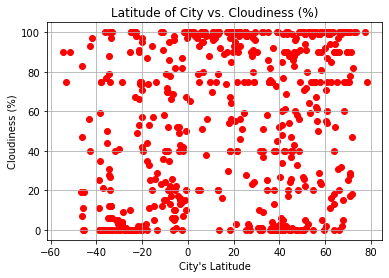

In [27]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker= "o", color= "red")

# Format
plt.xlabel("City's Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude of City vs. Cloudiness (%)")
plt.grid(True)

# Save figure
plt.savefig('../output_data/lat_vs_cloud.png')

## Latitude vs. Wind Speed Plot

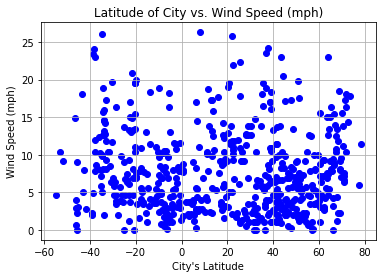

In [30]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker= "o", color= "blue")

# Format
plt.xlabel("City's Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude of City vs. Wind Speed (mph)")
plt.grid(True)

# Save figure
plt.savefig('../output_data/lat_vs_wind.png')

## Linear Regression

In [66]:
# Divide data into northern and southern hemisphere
north_hemi = weather_df.loc[weather_df["Lat"] >= 0]
south_hemi = weather_df.loc[weather_df["Lat"] < 0]

# Linear Regression Formula
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, color ="blue")
    plt.plot(x_values,regress_values,"r-", color ="green")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),color="red")
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6425980482762778


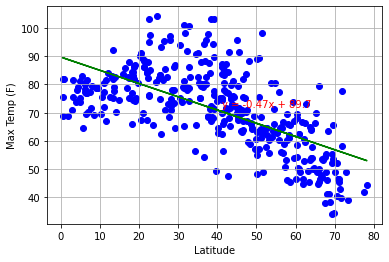

None


<Figure size 432x288 with 0 Axes>

In [67]:
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']
plt.ylabel("Max Temp (F)")
plt.grid(True)
print(linear_regression(x_values,y_values))

# Save Figure
plt.savefig('../output_data/north_hemi_temp_vs_lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7849618242613556


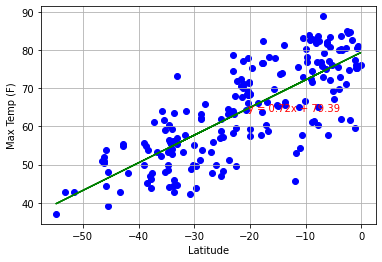

None


<Figure size 432x288 with 0 Axes>

In [68]:
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']
plt.ylabel("Max Temp (F)")
plt.grid(True)
print(linear_regression(x_values,y_values))

# Save Figure
plt.savefig('../output_data/south_hemi_temp_vs_lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.0012599574534671294


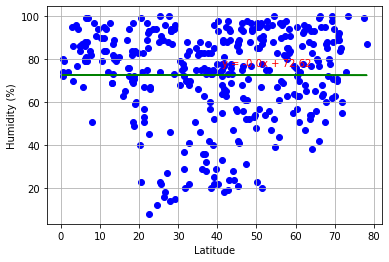

None


<Figure size 432x288 with 0 Axes>

In [69]:
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']
plt.ylabel("Humidity (%)")
plt.grid(True)
print(linear_regression(x_values,y_values))

# Save Figure
plt.savefig('../output_data/north_hemi_humid_vs_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07183247774323455


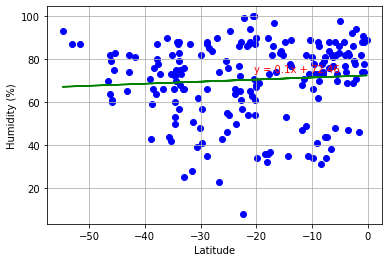

None


<Figure size 432x288 with 0 Axes>

In [70]:
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']
plt.ylabel("Humidity (%)")
plt.grid(True)
print(linear_regression(x_values,y_values))

# Save Figure
plt.savefig('../output_data/south_hemi_humid_vs_lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.1076553910519619


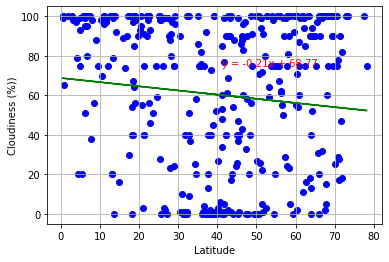

None


<Figure size 432x288 with 0 Axes>

In [71]:
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']
plt.ylabel("Cloudiness (%))")
plt.grid(True)
print(linear_regression(x_values,y_values))

# Save Figure
plt.savefig('../output_data/north_hemi_cloud_vs_lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.056882131839576945


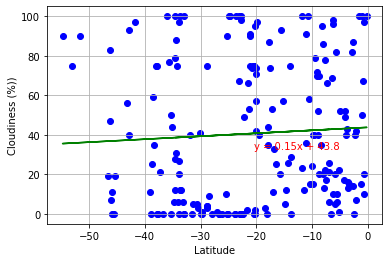

None


<Figure size 432x288 with 0 Axes>

In [72]:
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']
plt.ylabel("Cloudiness (%))")
plt.grid(True)
print(linear_regression(x_values,y_values))

# Save Figure
plt.savefig('../output_data/south_hemi_cloud_vs_lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017921588543148365


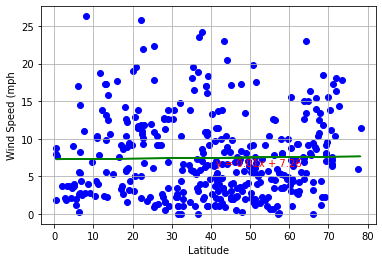

None


<Figure size 432x288 with 0 Axes>

In [73]:
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']
plt.ylabel("Wind Speed (mph")
plt.grid(True)
print(linear_regression(x_values,y_values))

# Save Figure
plt.savefig('../output_data/north_hemi_wind_vs_lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2277562705835206


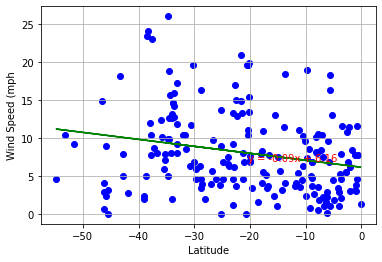

None


<Figure size 432x288 with 0 Axes>

In [74]:
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']
plt.ylabel("Wind Speed (mph")
plt.grid(True)
print(linear_regression(x_values,y_values))

# Save Figure
plt.savefig('../output_data/south_hemi_wind_vs_lat.png')